<a href="https://colab.research.google.com/github/ujs/open_data/blob/master/Yelp_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

## Data Wrangling 
Extracting data from JSON into CSV format.

In [28]:
def json_to_csv (filename, create_sample = False):
  '''converts given json file to csv'''
  json_data = []
  with open(filename, encoding = "utf8") as file:
    for line in file:
      json_data.append(json.loads(line.rstrip()))
  
  # since, each observation in the json_data list is a nested dictionary, we need to use 'from_dict'
  df = pd.DataFrame.from_dict(json_data)
  
  csvFileName = filename[:len(filename)-5] + '.csv'
  df.to_csv(csvFileName)
  print('{0} created'.format(csvFileName))

  if create_sample == True:
    np.random.seed(0)
    mask = np.random.rand(len(df)) <= 0.1
    sample = df[mask]
    sampleFileName = filename[:len(filename)-5] + '_sample.csv'

    sample.to_csv(sampleFileName)
    print('sample file, {0} created'.format(csvFileName))
    return df, sampleFileName

  else: return df,csvFileName

#testing function
filename = "/content/yelp_academic_dataset_business.json"
df_business, csvname_business = json_to_csv (filename)
df_business.head()

/content/yelp_academic_dataset_business.csv created


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


## Exploratory Data Analysis

In [49]:
#Understanding the basics of data
print('Number of features in business object: ', len(df_business.columns))
print('Features of the business: ', df_business.columns)
d_type_business = {i:df_business[i].dtype for i in df_business.columns}
print("Data type for each feature: ", d_types_business)

Number of features in business object:  14
Features of the business:  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
Data type for each feature:  {'business_id': dtype('O'), 'name': dtype('O'), 'address': dtype('O'), 'city': dtype('O'), 'state': dtype('O'), 'postal_code': dtype('O'), 'latitude': dtype('float64'), 'longitude': dtype('float64'), 'stars': dtype('float64'), 'review_count': dtype('int64'), 'is_open': dtype('int64'), 'attributes': dtype('O'), 'categories': dtype('O'), 'hours': dtype('O')}


total missing values in dataframe:  74412
business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64


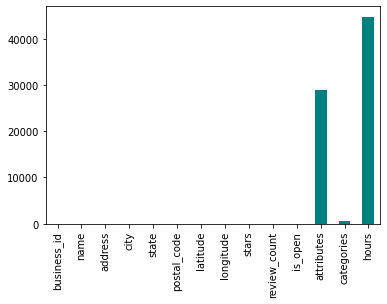

In [64]:
#Missing Values
def visualize_missing_values(df):
  missing_values = df.isnull().sum() 
  print("total missing values in dataframe: ", df.isnull().sum().sum())
  print(missing_values)
  missing_values.plot.bar(color = 'teal')

#testing function
visualize_missing_values(df_business)


In [50]:
df_business.describe

<bound method NDFrame.describe of                    business_id  ...                                              hours
0       f9NumwFMBDn751xgFiRbNA  ...  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...
1       Yzvjg0SayhoZgCljUJRF9Q  ...                                               None
2       XNoUzKckATkOD1hP6vghZg  ...                                               None
3       6OAZjbxqM5ol29BuHsil3w  ...  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...
4       51M2Kk903DFYI6gnB5I6SQ  ...  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...
...                        ...  ...                                                ...
209388  9Q0fPWAjUweoFDk0kafuzQ  ...  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
209389  PotiAhtDMYMNsJCzV0oLAw  ...                                               None
209390  SYa2j1boLF8DcGVOYfHPcA  ...  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
209391  RSSIsgO00OuWQTRoITacpA  ...  {'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '...
209392  t

In [0]:
#Seeing Missing Values

for column in df_